In [17]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

In [19]:
jenis_bahan = ['Pokok', 'Nabati', 'Hewani', 'Sayur', 'Buah' ,'Herbal']
bahan_makanan = []
for bahan in jenis_bahan:
  bahan_makanan.append(np.delete(pd.read_excel('/content/drive/MyDrive/Skrispsi/Lat5A_Manualisasi_dataBahan.xlsx', sheet_name=bahan).values, (0,1,2,8,9),1))
#print(bahan_makanan)
type(bahan_makanan)


list

In [20]:
#inisialisai Parameter

#iterasi_maximal =800
#popsize = 125
#cr = 0.5
#mr = 0.9
iterasi_maximal =2
popsize = 3
cr = 0.6
mr = 0.4
presentase_porsi= [0.35, 0.3, 0.35]
berat_asli = 100
#kebutuhan_gizi = np.zeros((5), dtype=np.int16)
#print ("kebutuhan gizi",kebutuhan_gizi)
kebutuhan_gizi = np.array([[0,1],[0,2],[0,3],[0,4],[0,5]])
populasi = np.zeros((popsize,18), dtype=np.int16)
#print("wawa", type(populasi))
allFitness = np.zeros(iterasi_maximal)

#tb = int(input("Tinggi Badan  :"))
tb = 141
#bb = int(input("Berat Badan   :"))
bb = 31
#umur = int(input("Umur        :"))
umur = 14
#gender = input("laki-laki(1) jika Perempuan(2) :")
gender = "1"

if gender == "1":
  if 13<= umur<=15 :
    berat_ideal = 50
    koreksi_berat = bb/berat_ideal
    #porsi_makan = [6.5, 1.5, 3,1.2, 3, 2, 0,5]
    porsi_makan = [6.5, 3, 3, 3, 4, 1]
    kalori_akg = 2400
    protein_akg = 70
    lemak_akg = 80
    karbohidrat_akg = 350
    vitc_akg = 75
    kebutuhan_energi = koreksi_berat*kalori_akg
    kebutuhan_protein = koreksi_berat*protein_akg
    kebutuhan_lemak = koreksi_berat*lemak_akg
    kebutuhan_karbohidrat = koreksi_berat*karbohidrat_akg
    kebutuhan_vitc= koreksi_berat*vitc_akg
    kebutuhan_gizi[:,1] = np.array([kebutuhan_energi, kebutuhan_protein, kebutuhan_lemak, kebutuhan_karbohidrat, kebutuhan_vitc])
    #kebutuhan_gizi1 = np.int_(kebutuhan_gizi)
    #kebutuhan_gizi1 =kebutuhan_gizi
    #kebutuhan_gizi2 =kebutuhan_gizi[:,1]

  elif 16<= umur<=18:
    berat_ideal = 60
    koreksi_berat = bb/berat_ideal
    porsi_makan = [8, 3, 3, 3, 4, 1]
    kalori_akg = 2650
    protein_akg = 75
    lemak_akg = 85
    karbohidrat_akg = 400
    vitc_akg = 90
    kebutuhan_energi = koreksi_berat*kalori_akg
    kebutuhan_protein = koreksi_berat*protein_akg
    kebutuhan_lemak = koreksi_berat*lemak_akg
    kebutuhan_karbohidrat = koreksi_berat*karbohidrat_akg
    kebutuhan_vitc= koreksi_berat*vitc_akg
    kebutuhan_gizi[:,1] = np.array([kebutuhan_energi, kebutuhan_protein, kebutuhan_lemak, kebutuhan_karbohidrat, kebutuhan_vitc])
    kebutuhan_gizi1 = kebutuhan_gizi[:,1]
  else:
    print("Anda Salah Memasukkan Umur")
elif gender == "2":
  if 13<= umur<=15:
    berat_ideal = 48
    koreksi_berat = bb/berat_ideal
    porsi_makan = [4.5, 3, 3, 3, 4, 1]
    kalori_akg = 2050
    protein_akg = 65
    lemak_akg = 70
    karbohidrat_akg = 300
    vitc_akg = 65
    kebutuhan_energi = koreksi_berat*kalori_akg
    kebutuhan_protein = koreksi_berat*protein_akg
    kebutuhan_lemak = koreksi_berat*lemak_akg
    kebutuhan_karbohidrat = koreksi_berat*karbohidrat_akg
    kebutuhan_vitc= koreksi_berat*vitc_akg
    kebutuhan_gizi[:,1] = np.array([kebutuhan_energi, kebutuhan_protein, kebutuhan_lemak, kebutuhan_karbohidrat, kebutuhan_vitc])
    kebutuhan_gizi1 = kebutuhan_gizi[:,1]
  elif 16<= umur<=18:
    berat_ideal = 52
    koreksi_berat = bb/berat_ideal
    porsi_makan = [5, 3, 3, 3, 4, 1]
    kalori_akg = 2100
    protein_akg = 65
    lemak_akg = 70
    karbohidrat_akg = 300
    vitc_akg = 75
    kebutuhan_energi = koreksi_berat*kalori_akg
    kebutuhan_protein = koreksi_berat*protein_akg
    kebutuhan_lemak = koreksi_berat*lemak_akg
    kebutuhan_karbohidrat = koreksi_berat*karbohidrat_akg
    kebutuhan_vitc= koreksi_berat*vitc_akg
    kebutuhan_gizi[:,1] = np.array([kebutuhan_energi, kebutuhan_protein, kebutuhan_lemak, kebutuhan_karbohidrat, kebutuhan_vitc])
    kebutuhan_gizi1 = kebutuhan_gizi[:,1]
  else:
    print("Anda Salah Memasukkan Umur")
else:
  print("Anda Salah Memasukkan Kode Gender")

print(koreksi_berat)
print("")
print("Kebutuhan Gizi")
print(kebutuhan_gizi)
#type(kebutuhan_gizi1)

0.62

Kebutuhan Gizi
[[   0 1488]
 [   0   43]
 [   0   49]
 [   0  217]
 [   0   46]]


In [21]:
#Menghitung Kebutuhan Berat

def hitung_berat(berat_asli, presentase_porsi, porsi_makan):
  kebutuhan_berat = []
  #for i in range(len(presentase_porsi)):
  for i in range(3):
    waktu = []
    #for j in range(len(porsi_makan)):
    for j in range(6):
      waktu.append((berat_asli * porsi_makan[j])* presentase_porsi[i])
    kebutuhan_berat.append(waktu)
  return kebutuhan_berat
kebutuhan_berat = hitung_berat(berat_asli, presentase_porsi, porsi_makan)
pagi, siang, malam = kebutuhan_berat
print("pagi   :", pagi)
print("siang  :", siang)
print("malam  :", malam)

type(pagi)

pagi   : [227.49999999999997, 105.0, 105.0, 105.0, 140.0, 35.0]
siang  : [195.0, 90.0, 90.0, 90.0, 120.0, 30.0]
malam  : [227.49999999999997, 105.0, 105.0, 105.0, 140.0, 35.0]


list

In [22]:
def kandungan_gizi(berat_asli, kebutuhan_berat):
  kandungan_gizi_sesuai_berat = []
  #bahan1 = bahan_makanan[0]
  for a in range(len(kebutuhan_berat)):
    cobaa = []
    for b in range(len(kebutuhan_berat[0])):
      cobab = []
      for c in range(len(bahan_makanan[b])):
        cobac = []
        for d in range(len(bahan_makanan[0][0])):
          cobac.append((kebutuhan_berat[a][b]/berat_asli)* bahan_makanan[b][c][d])
        cobab.append(cobac)
      cobaa.append(cobab)
    kandungan_gizi_sesuai_berat.append(cobaa)
  return kandungan_gizi_sesuai_berat

kandungan_gizi_sesuai_berat = kandungan_gizi(berat_asli,kebutuhan_berat)
Kpagi, Ksiang, Kmalam = kandungan_gizi_sesuai_berat

kandunganpokokpagi,kandungannabatipagi,kandunganhewanipagi,kandungansayurpagi,kandunganbuahpagi,kandunganpelengkappagi=Kpagi
kandungannabatipagi
print(kandunganpokokpagi)
type(kandunganpokokpagi)

[[259.34999999999997, 1.82, 1.1375, 60.74249999999999, 50.05, 2957.5], [279.825, 4.095, 1.5924999999999998, 63.4725, 50.05, 2730.0], [819.0, 10.6925, 0.2275, 186.77749999999997, 0.0, 2047.5], [1041.95, 15.6975, 32.76, 170.8525, 0.0, 5232.5], [825.8249999999999, 19.792499999999997, 0.91, 179.0425, 0.0, 3526.25], [780.3249999999999, 0.6825, 0.0, 193.375, 0.0, 3981.25], [564.1999999999999, 18.2, 2.73, 113.75, 0.0, 4550.0], [771.225, 22.75, 3.8674999999999997, 173.58249999999998, 0.0, 4550.0], [245.7, 3.1849999999999996, 0.91, 56.875, 9.1, 3640.0], [812.175, 19.11, 3.8674999999999997, 175.40249999999997, 0.0, 2957.5], [823.55, 1.1375, 0.6825, 197.69750000000002, 0.0, 5232.5], [195.65, 1.365, 7.507499999999999, 31.849999999999998, 0.0, 5232.5], [825.8249999999999, 19.792499999999997, 0.91, 179.0425, 0.0, 3867.5], [819.0, 15.469999999999999, 1.5924999999999998, 179.4975, 0.0, 2786.875], [784.875, 20.702499999999997, 4.55, 174.0375, 0.0, 3367.0], [809.9, 15.924999999999999, 1.5924999999999998

list

In [23]:
##Algoritma Genetika

for a in range(popsize):
  j=0
  for b in range(len(presentase_porsi)):
    for c in range(len(bahan_makanan)):
      populasi[a,j] = rd.randrange(0, len(bahan_makanan[c])-1)
      #print("bahan", len(bahan_makanan[c]-2))
      j+=1
      
##print(len(bahan_makanan))
#
populasi = np.array([[5, 8 ,8, 3, 17, 4, 2, 3, 4, 9, 12, 2, 20, 16, 36, 34, 20, 3], 
                     [4, 6, 5, 16, 20, 1, 1, 6, 5, 4, 13, 2, 21, 15, 35, 22, 4, 1], 
                     [7, 2, 21, 11,3, 3, 5, 17, 8, 14, 11, 1, 21, 3, 11, 11, 13, 3]])

#print(populasi)

In [24]:
#GENETIC ALGORITHM
#TotalPaket = np.zeros((populasi.shape[0], 4))
#print("len ds", len(dataset))
#for i in range(popsize):
#        j = 0
#        for n in range(3):
#            
#            for m in range(len(bahan_makanan)):
#                # TotalPaket[i] += dataset[m][populasi[i, j]]
#                populasi[i, j] = rd.randrange(0, len(bahan_makanan[m]) - 1)
#                #print(n, m, len(bahanMakanan[m]) - 1, populasi[i, j])
#                j += 1

#populasi = np.array([[5, 8 ,8, 3, 17, 4, 2, 3, 4, 9, 12, 2, 20, 16, 36, 34, 20, 3], 
#                     [4, 6, 5, 16, 20, 1, 1, 6, 5, 4, 13, 2, 21, 15, 35, 22, 4, 1], 
#                     [7, 2, 21, 11,3, 3, 5, 17, 8, 14, 11, 1, 21, 3, 11, 11, 13, 3]])

#populasi = np.array([[16, 1, 30, 35, 20, 5, 3, 12, 0, 35, 19, 6, 9, 12, 7, 33, 22, 8], 
#                     [13, 5, 4, 5, 20, 10, 1, 5, 27, 25, 8, 0 ,15 ,15 ,5 ,0 ,5 ,11], 
#                     [12, 7, 11 ,13 ,19 ,2 ,19 ,11 ,13 ,34 ,12 ,4 ,2 ,4 ,13 ,11 ,2 ,9]])
print("inisialisasi", populasi)



inisialisasi [[ 5  8  8  3 17  4  2  3  4  9 12  2 20 16 36 34 20  3]
 [ 4  6  5 16 20  1  1  6  5  4 13  2 21 15 35 22  4  1]
 [ 7  2 21 11  3  3  5 17  8 14 11  1 21  3 11 11 13  3]]


In [25]:
def two_cut_points(P1,P2):
  C1 = P1.copy()
  C2 = P2.copy()
  #cutpoint1 = np.int32(rd.uniform(0,len(C1)-1))
  #cutpoint2 = np.int32(rd.uniform(0,len(C1)-1))
  #cutpoint1 = np.random.randint(0,C1.shape[0]-1)
  #cutpoint2 = np.random.randint(cutpoint1+1, C1.shape[0])
  cutpoint1 = 5
  cutpoint2 = 11
  #cutpoint = math.floor(len(P1)/9)
  C1[cutpoint1:cutpoint2] = P2[cutpoint1:cutpoint2]
  C2[cutpoint1:cutpoint2] = P1[cutpoint1:cutpoint2]
  #C1[cutpoint:],C2[cutpoint:] = P2[cutpoint:],P1[cutpoint:]
  return C1,C2


In [26]:
def scrambler_mutasi(c3):
  a = c3.copy()
  #b = np.random.randint(0,a.shape[0]-1)
  #c = np.random.randint(b+1, a.shape[0])
  b = 0
  c = 7
  #d = np.random.choice(np.arange(b,c+1), c+1-b, replace = False)
  a[b:c+1]=a[b:c+1][::-1]
  #a[b:c+1]=a[d]
  m=0
  for i in range(len(a)):
    if a[i]>(len(bahan_makanan[m])-1):
      a[i] = len(bahan_makanan[m])-1
    m+=1
    if m == len(bahan_makanan):
      m=0
      a[a<0]=0
  return a

In [27]:
#for iterasi in range(1):           
#
#  for m in range(np.round(mr * popsize).astype(np.int8)):
#          #idx = np.random.randint(0, popsize)
#          #offspring = mutasi(populasi[idx])
#          #populasi = np.vstack((populasi, offspring,pop))
#          #c3 = scrambler_mutasi(populasi[(np.int32(rd.uniform(0,len(populasi))))])
#          c3 = scrambler_mutasi(populasi[2])
#          c33 = c3
#  populasi1 =  c33  
#  print(populasi1)

In [28]:
def calculateFitness(populasi):
    TotalPaket = np.zeros((len(populasi), len(bahan_makanan[0][0])))
                
    for i in range(len(populasi)):# looping untuk setiap populasi
        j = 0
        for n in range(3):#     pagi, siang, malam
            for m in range(len(bahan_makanan)):   #   looping untuk setiap jenis bahan (nabati, pokok, ...)
#                 print(i, n, m, j, "idx", populasi[i, j], "max", len(bahanMakanan[m]))
                TotalPaket[i] = TotalPaket[i] + (bahan_makanan[m][populasi[i, j]] * kebutuhan_berat[n][m] / 100)
                j += 1
    #print("aw", TotalPaket[:,:-1])
    #print ("ab", kebutuhan_gizi[:,1])
    Penalti = np.abs(TotalPaket[:, :-1] - kebutuhan_gizi[:, 1])


    #print("kebutuhan gizi", kebutuhan_gizi[:,0])
    totalPN = (1000 / np.sum(Penalti, axis=1))
    totalHR = (10000 / TotalPaket[:, -1])
    #print("pn PN", totalPN)
    #print("pn hr",totalHR)
    Fitness =  totalPN + totalHR  # 1000 / (sumPinalti + harga)
    print("fitness", np.round(Fitness,3))
    bestFit = np.argmax(Fitness)
    print("Kebutuhan Gizi")
    print(kebutuhan_gizi)
    print("makanan",np.round(TotalPaket[bestFit],2))
    print("minum",np.round(Penalti[bestFit],2))
    #print("makanan",Penalti[bestFit]+kebutuhan_gizi[:,1])
    print("Penalti a : ", np.round(Penalti[bestFit]*100/kebutuhan_gizi[:,1],2))
    #print("Penalti : ", np.sum(Penalti, axis=1)[bestFit])
    print("Harga : ", TotalPaket[bestFit, -1])
    return Fitness

In [29]:
#def calculateFitness(populasi):
#    TotalPaket = np.zeros((len(populasi), len(bahan_makanan[0][0])))
#                
#    for i in range(len(populasi)):# looping untuk setiap populasi
#        j = 0
#        for n in range(3):#     pagi, siang, malam
#            for m in range(len(bahan_makanan)):   #   looping untuk setiap jenis bahan (nabati, pokok, ...)
##                 print(i, n, m, j, "idx", populasi[i, j], "max", len(bahanMakanan[m]))
#                TotalPaket[i] = TotalPaket[i] + (bahan_makanan[m][populasi[i, j]] * kebutuhan_berat[n][m] / 100)
#                j += 1
#    #print("aw", TotalPaket[:,:-1])
#    #print ("ab", kebutuhan_gizi[:,1])
#    Penalti = np.abs(TotalPaket[:, :-1] - kebutuhan_gizi[:, 1])
#    penalti2 = 1000/TotalPaket
#
#
#    #print("kebutuhan gizi", kebutuhan_gizi[:,0])
#    totalPN = (1000 / np.sum(penalti2, axis=1))
#    totalHR = (10000 / TotalPaket[:, -1])
#    #print("pn PN", totalPN)
#    #print("pn hr",totalHR)
#    Fitness =  totalPN + totalHR  # 1000 / (sumPinalti + harga)
#    #print("fitness", Fitness)
#    bestFit = np.argmax(Fitness)
#    print("Kebutuhan Gizi")
#    print(kebutuhan_gizi)
#    print("makanan",TotalPaket[bestFit])
#    print("minum",Penalti[bestFit])
#    #print("makanan",Penalti[bestFit]+kebutuhan_gizi[:,1])
#    print("Penalti a : ", Penalti[bestFit]*100/kebutuhan_gizi[:,1])
#    #print("Penalti : ", np.sum(Penalti, axis=1)[bestFit])
#    print("Harga : ", TotalPaket[bestFit, -1])
#    return Fitness

fitness [0.418 0.502 0.445 0.453 0.477 0.427]
Kebutuhan Gizi
[[   0 1488]
 [   0   43]
 [   0   49]
 [   0  217]
 [   0   46]]
makanan [ 3498.8    140.58    83.74   596.61   242.55 74381.25]
minum [2010.8    97.58   34.74  379.61  196.55]
Penalti a :  [135.13 226.93  70.89 174.93 427.28]
Harga :  74381.25

Iterasi ke- 1 
Populasi terbaik : 
 [ 4  6  5 16 20  1  1  6  5  4 13  2 21 15 35 22  4  1] 
Fitness : 
 0.5021874953178396
0
fitness [0.502 0.477 0.453 0.477 0.502 0.565]
Kebutuhan Gizi
[[   0 1488]
 [   0   43]
 [   0   49]
 [   0  217]
 [   0   46]]
makanan [3.229570e+03 1.479900e+02 5.313000e+01 5.719100e+02 7.454000e+01
 8.490974e+04]
minum [1741.57  104.99    4.13  354.91   28.54]
Penalti a :  [117.04 244.16   8.43 163.55  62.04]
Harga :  84909.7375

Iterasi ke- 2 
Populasi terbaik : 
 [ 6  1  1 17  3  4  8  5  5  4 13  2 20 16 36 34 20  3] 
Fitness : 
 0.5653711453172211
1


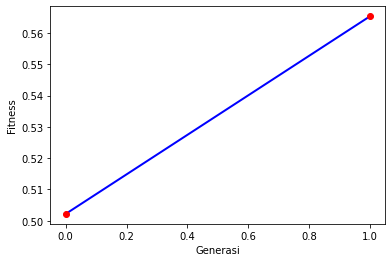

In [30]:
for iterasi in range(iterasi_maximal):
  for c in range(np.round(cr * popsize/2).astype(np.int8)):
          #idx = np.random.choice(range(popsize), 2, replace=False)
          offspring1, offspring2 = two_cut_points(populasi[0], populasi[1])
          #offspring1, offspring2 = two_cut_points(populasi[np.int32(rd.uniform(0,len(populasi)))], populasi[np.int32(rd.uniform(0,len(populasi)))])
          pop = np.vstack((offspring1,offspring2))
            

  for m in range(np.round(mr * popsize).astype(np.int8)):
          #idx = np.random.randint(0, popsize)
          #offspring = mutasi(populasi[idx])
          #populasi = np.vstack((populasi, offspring,pop))
          #c3 = scrambler_mutasi(populasi[(np.int32(rd.uniform(0,len(populasi))))])
          c3 = scrambler_mutasi(populasi[2])
          c33 = c3
  populasi = np.vstack((populasi, pop,c33))
  #print("\npopulasi\n", populasi, "\n len: ", len(populasi))
  fitness = calculateFitness(populasi)
  #print("fitness", fitness, "\n len : ", len(fitness))
  populasi = populasi[fitness.argsort()[::-1]][:popsize]
  #print("Populasi terbaik ",populasi)
      # print("\npopulasi after\n", populasi)
  bestPopulation = populasi[0]
  bestFitness = np.amax(fitness)
  allFitness[iterasi] = bestFitness
  print("\nIterasi ke-", iterasi+1, "\nPopulasi terbaik : \n", bestPopulation ,"\nFitness : \n", bestFitness)
  print(np.argmax(allFitness))
plt.plot(range(iterasi_maximal), allFitness, 'b-', label='line 1', linewidth=2)
plt.plot(range(iterasi_maximal), allFitness, 'or', label='line 2')
plt.ylabel("Fitness")
plt.xlabel("Generasi")
plt.show()